C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_2464\80516301.py:18: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


Training data size: 104
Testing data size: 27
MA(1) AIC: 479.59080475577304
MA(2) AIC: 481.42035499801995
MA(3) AIC: 482.22687991650145
MA(4) AIC: 482.6449142833927
MA(5) AIC: 483.85607224296626

Best MA Model Selected: MA(1)

Forecast Accuracy Metrics:
MAE  : 2.8338
RMSE : 3.5176
MAPE : 101.61%


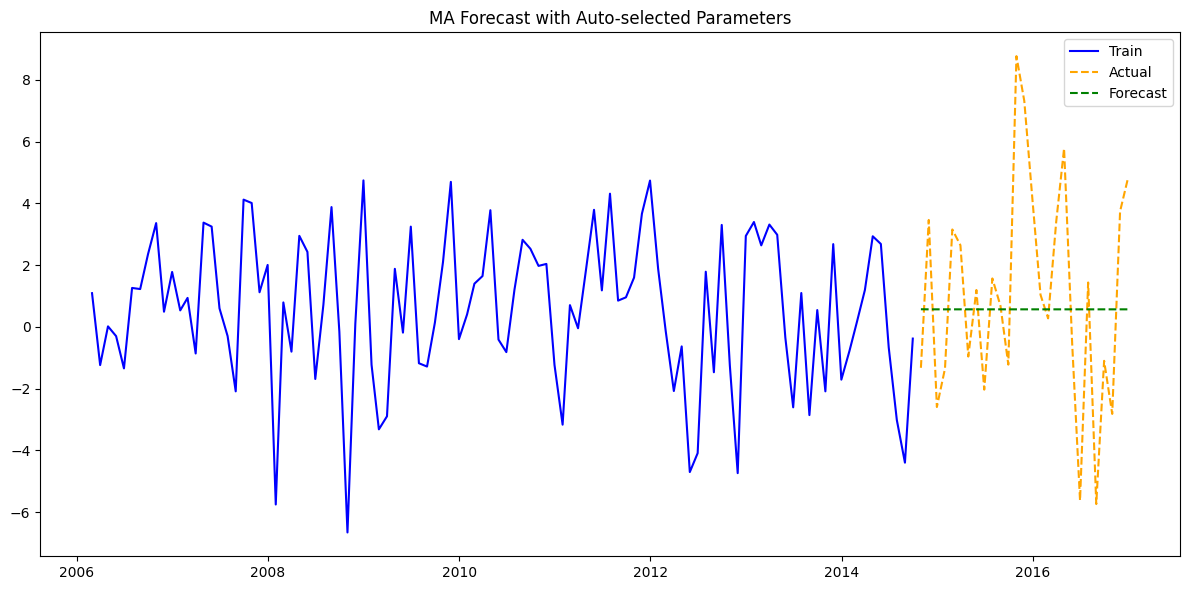

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------------------------
# 1. Load CSV file
# ---------------------------------
input().strip()
df = pd.read_csv("ML471_S2_Datafile_Practice.csv")

# ---------------------------------
# 2. Parse Date column (keep exact dates)
# ---------------------------------
date_col = 'Date' if 'Date' in df.columns else 'Datetime'
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])
df.set_index(date_col, inplace=True)

# Infer frequency without changing dates
df.index = pd.DatetimeIndex(df.index, freq=pd.infer_freq(df.index))

# ---------------------------------
# 3. Prepare Close_diff series
# ---------------------------------
df = df.dropna(subset=['Close_diff'])
series = df['Close_diff']

# ---------------------------------
# 4. Train–test split (80:20)
# ---------------------------------
train_size = int(len(series) * 0.8)
train = series.iloc[:train_size]
test = series.iloc[train_size:]

print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")

# ---------------------------------
# 5. Auto-select MA(q) using AIC
# ---------------------------------
best_aic = np.inf
best_q = 1
best_model = None

for q in range(1, 6):
    try:
        model = ARIMA(train, order=(0, 0, q))
        result = model.fit()
        print(f"MA({q}) AIC: {result.aic}")
        if result.aic < best_aic:
            best_aic = result.aic
            best_q = q
            best_model = result
    except:
        continue

print(f"\nBest MA Model Selected: MA({best_q})")

# ---------------------------------
# 6. Forecast on test period
# ---------------------------------
forecast = best_model.forecast(steps=len(test))
forecast.index = test.index

# ---------------------------------
# 7. Forecast accuracy metrics
# ---------------------------------
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nForecast Accuracy Metrics:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

# ---------------------------------
# 8. Visualization
# ---------------------------------
plt.figure(figsize=(12, 6))

plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', linestyle='--', color='orange')
plt.plot(forecast, label='Forecast', linestyle='--', color='green')

plt.title("MA Forecast with Auto-selected Parameters")
# plt.xlabel("Time")
# plt.ylabel("Close_diff")
plt.legend()
plt.tight_layout()
plt.show()
